In [1]:
%matplotlib inline
from pylab import *
import os
from scipy.stats import binned_statistic as bst
from readsnapsgl import readsnap
from scipy.stats import binned_statistic
def calpu(x):
    return np.percentile(x,85)
def calpd(x):
    return np.percentile(x,15)

Xspath = "/home2/weiguang/The300/data/simulation/GadgetX/"
MDpath = "/home2/weiguang/The300/data/simulation/MDPL2/"
Mspath = "/home2/weiguang/The300/data/simulation/GadgetMUSIC/"
Mpath = "/home2/weiguang/MUSIC/MUSIC_PLANCK/GAS_STARS/"
path="/home2/weiguang/The300/data/simulation/GadgetX/"
h=0.6777
sname = "/snap_128"

In [2]:
GIZMO=np.load('../Halo_mass_function_mass-difference/GIZMO/GS_Mass_snap_128info.npy')

In [24]:
cln=322

In [25]:
GHR=np.loadtxt("/home2/weiguang/data7/GZ-HR-test/NewMDCLUSTER_%04d/AHF/C500_snap_010.z0.000.AHF_halos"%cln)

In [7]:
GIZMO[:,0]

array([  1.,   1.,   1., ..., 324., 324., 324.])

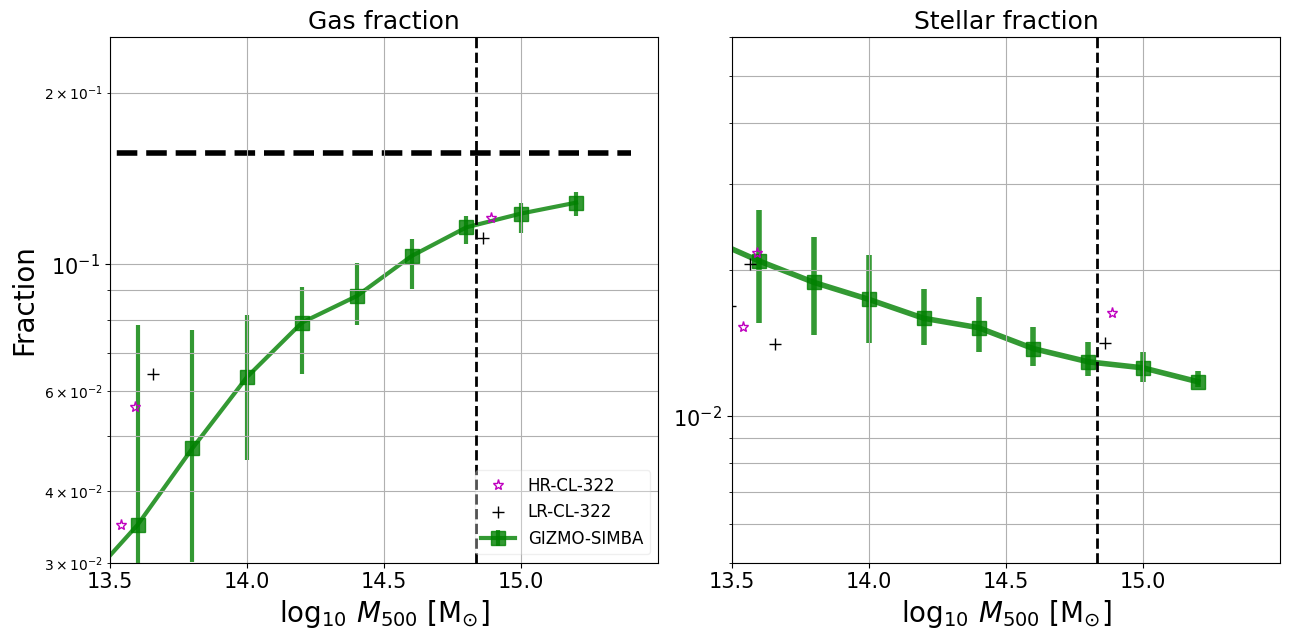

In [26]:
fig=plt.figure(1,figsize=(13,6.5))
gasylim=[3.0e-2,0.25]
starylim=[5.0e-3,0.06]
mlim=[13.5,15.5]
X=np.arange(13.2,mlim[1],0.2); xx=(X[1:]+X[:-1])/2
lvsp=0.4
nbn=X
nbnz=X-0.1;xxz=xx-0.1

# Gas 
subplot(121)

x=np.log10(GIZMO[:,12]/0.6777)
myp=GIZMO[:,14]
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 84), bins=nbnz)
errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color='g',lw=3,ls="-", ms=10,alpha=0.8,zorder=0, label="GIZMO-SIMBA")
# np.savetxt('figdata/BF-gas-GIZMO-M500.txt',np.asarray([xx, pm, pl, pu]).T, header='\log M500 [M_sun], f_gas, f_l, f_u')

x=np.log10(GHR[:,3])-np.log10(0.6777)
myp=GHR[:,44]/GHR[:,3]
plot(x,myp, ls='',marker='*',color='m',ms=8, label='HR-CL-%03d'%cln, mfc='none',zorder=9)

ids=GIZMO[:,0]==cln
x=np.log10(GIZMO[ids,12])-np.log10(0.6777)
myp=GIZMO[ids,14]
plot(x,myp, ls='',marker='+',color='k',ms=8, label='LR-CL-%03d'%cln,zorder=9)

plot([13,15.4],[0.048206/0.307115,0.048206/0.307115],'k--',zorder=-9,lw=4)
plot([np.log10(4.62e14/0.6777),np.log10(4.62e14/0.6777)],gasylim,'k--',lw=2)

xlabel(r"$\log_{10}\ M_{500}\ [\rm{M}_{\odot}]$",fontsize=20)
yscale('log')
# xscale('log')
grid(visible=True,which='major')
grid(visible=True,which='minor')
ylim(gasylim)
xlim(mlim)
xticks(arange(mlim[0],mlim[1],0.5),fontsize=15)
yticks(fontsize=15)
legend(loc=4,ncol=1,fontsize=12,markerscale=1,framealpha=0.3,columnspacing=0.1) #,fontsize=18
ylabel("Fraction",fontsize=20)
title("Gas fraction",fontsize=18)


subplot(122)

x=np.log10(GIZMO[:,12]/0.6777)
myp=GIZMO[:,15]
pl,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 16), bins=nbnz)
pm,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 50), bins=nbnz)
pu,be,bn=bst(x, myp, statistic=lambda y: np.percentile(y, 86), bins=nbnz)
errorbar(xxz, pm, yerr=np.append(pm-pl,pu-pm).reshape(2,pl.size),
         marker='s',color='g',lw=4,ls="-", ms=10,zorder=0,alpha=0.8)
# np.savetxt('figdata/BF-star-GIZMO-figure.txt',np.asarray([xx, pm, pl, pu]).T, header='\log M500 [M_sun], f_star, f_l, f_u')

x=np.log10(GHR[:,3])-np.log10(0.6777)
myp=GHR[:,64]/GHR[:,3]
plot(x,myp, ls='',marker='*',color='m',ms=8, mfc='none',zorder=9)

ids=GIZMO[:,0]==cln
x=np.log10(GIZMO[ids,12])-np.log10(0.6777)
myp=GIZMO[ids,15]
plot(x,myp, ls='',marker='+',color='k',ms=8,zorder=9)

plot([np.log10(4.6e14/0.6777),np.log10(4.6e14/0.6777)],starylim,'k--',lw=2)
title("Stellar fraction",fontsize=18)
xlabel(r"$\log_{10}\ M_{500} \ [\rm{M}_{\odot}]$",fontsize=20)
ylim(starylim)
xlim(mlim)
grid(visible=True,which='major')
grid(visible=True,which='minor')
yscale('log')
# legend(loc=3,ncol=2,fontsize=12,markerscale=1,framealpha=0.3,columnspacing=0.1)
xticks(arange(mlim[0],mlim[1],0.5),fontsize=15)
yticks(fontsize=15)

tight_layout()
savefig("plots/BF-resolution.pdf",dpi=300)